## Useful Links
[Nibabel Basic Tutorial](https://nipy.org/nibabel/coordinate_systems.html)  
[Nibabel Analyze Image Documentation](https://nipy.org/nibabel/reference/nibabel.analyze.html)

In [2]:
import os
import skimage
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

from nibabel.analyze import AnalyzeHeader

In [3]:
root = '../data/LPBA40/native_space'
subjects = ['S'+str(num) if num >= 10 else 'S0'+str(num) for num in range(1,40)]

In [4]:
f = open('../data/LPBA40-2/native_space_radio/S01/S01.native_radio.mri.hdr', 'rb')
binblock = f.read()
hdr = AnalyzeHeader(binblock)

image_shape = hdr.get_data_shape()
print('Shape :',image_shape)
width, height, depth, _ = image_shape

Shape : (256, 124, 256, 1)


In [5]:
f = open('../data/LPBA40/native_space/S01/S01.native.mri.img', 'rb')
raw_image = np.fromfile(f, np.uint16)
image = raw_image.reshape(image_shape).squeeze()
image.shape

(256, 124, 256)

In [7]:
image = skimage.transform.resize(image, (256,256,256), anti_aliasing=True)

In [8]:
def normalize(image):
    image = 2 * (image - image.min()) / (image.max() - image.min())-1
    return image

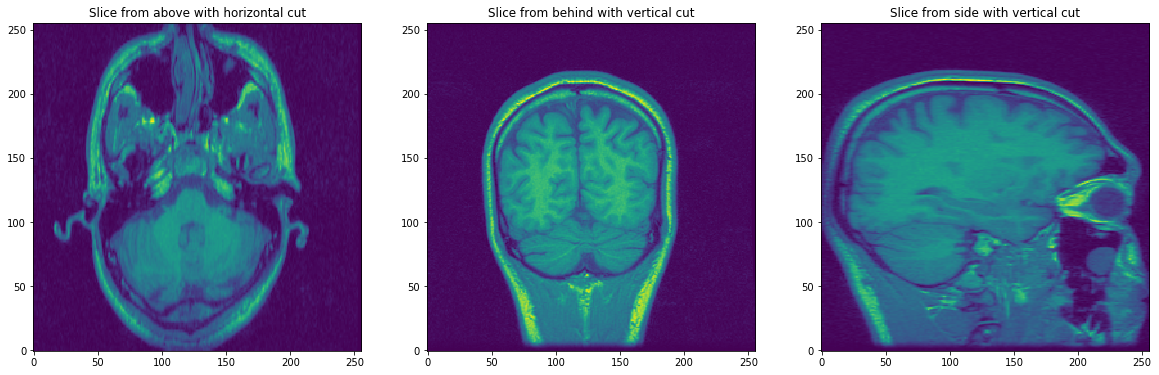

In [9]:
plt.figure(figsize=(20,20))

plt.subplot(131)
mri_slice = normalize(image[80, :, :])
plt.title('Slice from above with horizontal cut')
plt.imshow(mri_slice, cmap='viridis', origin='lower')

plt.subplot(132)
mri_slice = normalize(image[:, 57, :])
plt.title('Slice from behind with vertical cut')
plt.imshow(mri_slice, cmap='viridis', origin='lower')

plt.subplot(133)
mri_slice = normalize(image[:, :, 150])
plt.title('Slice from side with vertical cut')
plt.imshow(mri_slice, cmap='viridis', origin='lower')

From the above images, most likely only perform registration on images from the first two cuts 